In [1]:
%matplotlib inline

import yfinance as yf
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import datetime as dt
from dateutil.relativedelta import relativedelta

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )

'en_US.UTF-8'

In [2]:
nse30 = pd.read_csv('nse30_historical.csv')
nse30.sort_index(ascending=False, inplace=True)
nse30.index = pd.to_datetime(nse30['Date'])
for i in range(0, len(nse30)):
    nse30['Open'].iloc[i] = locale.atof(nse30['Open'].iloc[i])
type(nse30['Open'].iloc[0])

/tmp/ipykernel_127997/3501598673.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nse30['Open'].iloc[i] = locale.atof(nse30['Open'].iloc[i])


float

In [3]:
today = dt.datetime.today()
yesterday = today - dt.timedelta(days=1)
end_date = dt.datetime.date(today)
# start_date = end_date - relativedelta(years=19, months=7)
start_date = dt.date(2005, 1, 3)

In [4]:
# initializing parameters
# exchange_rates = ['USDTRY=X', 'EURTRY=X', 'GBPTRY=X', 'GC=F']
stock_indices = ['^MXX', '^JKSE', '^GSPTSE', '^FCHI', '^GDAXI', 'FTSEMIB.MI', '^N225', '^FTSE', '^GSPC', 'XU100.IS']
# data_rates = yf.download(exchange_rates, start=start_date, end=end_date)
data_indices = yf.download(stock_indices, start=start_date, end=end_date)
data_indices = data_indices['2012-01-30':]
data_indices

[*********************100%%**********************]  10 of 10 completed


Price       Adj Close                                                        \
Ticker     FTSEMIB.MI      XU100.IS        ^FCHI        ^FTSE        ^GDAXI   
Date                                                                          
2012-01-30    15753.0  57811.800781  3265.639893  5671.100098   6444.450195   
2012-01-31    15828.0  57171.300781  3298.550049  5681.600098   6458.910156   
2012-02-01    16265.0  59215.699219  3367.459961  5790.700195   6616.640137   
2012-02-02    16277.0  60051.898438  3376.659912  5796.100098   6655.629883   
2012-02-03    16440.0  60148.000000  3427.919922  5901.100098   6766.669922   
...               ...           ...          ...          ...           ...   
2024-08-07    31832.0  10024.299805  7266.009766  8166.899902  17615.150391   
2024-08-08    31742.0  10098.500000  7247.450195  8145.000000  17680.400391   
2024-08-09    31782.0   9907.400391  7269.709961  8168.100098  17722.880859   
2024-08-12    31928.0   9828.599609  7250.669922  8210.299805  17726.470703   
2024-08-13    32006.0   9920.599609  7275.870117  8235.200195  17812.050781   

Price                                                             \
Ticker            ^GSPC       ^GSPTSE        ^JKSE          ^MXX   
Date                                                               
2012-01-30  1313.010010  12436.400391  3915.007568  37241.609375   
2012-01-31  1312.410034  12452.200195  3941.539795  37422.679688   
2012-02-01  1324.089966  12517.700195  3964.821777  37709.648438   
2012-02-02  1325.540039  12553.500000  4016.745605  37711.160156   
2012-02-03  1344.900024  12577.299805  4015.792480  38092.808594   
...                 ...           ...          ...           ...   
2024-08-07  5199.500000  21881.000000  7212.130859  52680.898438   
2024-08-08  5319.310059  22225.599609  7195.121094  52876.550781   
2024-08-09  5344.160156  22311.300781  7256.996094  53051.539062   
2024-08-12  5344.390137  22398.900391  7297.625000  53040.351562   
2024-08-13  5434.430176  22618.199219  7356.638184  53674.199219   

Price                     ...        Volume                             \
Ticker             ^N225  ...    FTSEMIB.MI      XU100.IS        ^FCHI   
Date                      ...                                            
2012-01-30   8793.049805  ...  7.618660e+08  4.992160e+08  141927600.0   
2012-01-31   8802.509766  ...  9.369103e+08  6.526520e+08  130102200.0   
2012-02-01   8809.790039  ...  1.241867e+09  6.891640e+08  160844200.0   
2012-02-02   8876.820312  ...  1.158578e+09  8.260750e+08  139818800.0   
2012-02-03   8831.929688  ...  1.359244e+09  6.972310e+08  172897800.0   
...                  ...  ...           ...           ...          ...   
2024-08-07  35089.621094  ...  4.682873e+08  2.455179e+09   77887500.0   
2024-08-08  34831.148438  ...  3.514106e+08  2.298654e+09   48242600.0   
2024-08-09  35025.000000  ...  2.728395e+08  2.399290e+09   43632200.0   
2024-08-12           NaN  ...  2.284206e+08  2.616143e+09   38393400.0   
2024-08-13  36232.511719  ...  3.044151e+08  2.480962e+09   40391200.0   

Price                                                                          \
Ticker             ^FTSE       ^GDAXI         ^GSPC      ^GSPTSE        ^JKSE   
Date                                                                            
2012-01-30  7.781000e+08  140511800.0  3.659010e+09  187569700.0   28566300.0   
2012-01-31  1.018319e+09  158039800.0  4.235550e+09  209443200.0   34190200.0   
2012-02-01  9.852471e+08  210399200.0  4.504360e+09  213032700.0   36201200.0   
2012-02-02  9.673886e+08  156001200.0  4.120920e+09  200591200.0   46876600.0   
2012-02-03  1.156774e+09  194732400.0  4.608550e+09  213276200.0   42300400.0   
...                  ...          ...           ...          ...          ...   
2024-08-07  8.164426e+08   73601400.0  4.558260e+09  260264600.0  128572200.0   
2024-08-08  7.554628e+08   61730800.0  4.016830e+09  207742800.0  125248900.0   
2024-08-09  

In [5]:
idx = pd.date_range(
    data_indices.index[0].date(),
    data_indices.index[-1].date()
)
idx

DatetimeIndex(['2012-01-30', '2012-01-31', '2012-02-01', '2012-02-02',
               '2012-02-03', '2012-02-04', '2012-02-05', '2012-02-06',
               '2012-02-07', '2012-02-08',
               ...
               '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-07',
               '2024-08-08', '2024-08-09', '2024-08-10', '2024-08-11',
               '2024-08-12', '2024-08-13'],
              dtype='datetime64[ns]', length=4580, freq='D')

In [6]:
# data_rates.index = pd.DatetimeIndex(data_rates.index)
# data_rates = data_rates.reindex(idx, fill_value=np.nan).ffill()
data_indices.index = pd.DatetimeIndex(data_indices.index)
data_indices = data_indices.reindex(idx, fill_value=np.nan).ffill()
data_indices = data_indices.reindex(idx, fill_value=np.nan).bfill()
nse30 = nse30.reindex(idx, fill_value=np.nan).ffill()
nse30 = nse30.reindex(idx, fill_value=np.nan).bfill()

/tmp/ipykernel_127997/1938292255.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nse30 = nse30.reindex(idx, fill_value=np.nan).ffill()


In [7]:
print(data_indices['Open'])
print(nse30['Open'])
nse30['Open'].isnull().sum()

Ticker      FTSEMIB.MI      XU100.IS        ^FCHI        ^FTSE        ^GDAXI  \
2012-01-30     15837.0  57053.898438  3295.979980  5733.500000   6454.540039   
2012-01-31     15939.0  58236.199219  3292.010010  5671.100098   6489.040039   
2012-02-01     15843.0  57079.699219  3320.320068  5681.600098   6482.950195   
2012-02-02     16344.0  59227.101562  3386.629883  5790.700195   6640.049805   
2012-02-03     16252.0  59872.199219  3370.629883  5796.100098   6649.569824   
...                ...           ...          ...          ...           ...   
2024-08-09     31814.0  10160.000000  7259.700195  8145.000000  17672.900391   
2024-08-10     31814.0  10160.000000  7259.700195  8145.000000  17672.900391   
2024-08-11     31814.0  10160.000000  7259.700195  8145.000000  17672.900391   
2024-08-12     31889.0   9980.200195  7296.839844  8168.100098  17784.029297   
2024-08-13     32078.0   9842.200195  7277.700195  8210.299805  17799.660156   

Ticker            ^GSPC       ^GSPTSE  

0

In [8]:
df = data_indices['Open']
df.insert(10, 'NSE30', nse30['Open'])
df

Ticker,FTSEMIB.MI,XU100.IS,^FCHI,^FTSE,^GDAXI,^GSPC,^GSPTSE,^JKSE,^MXX,^N225,NSE30
2012-01-30,15837.0,57053.898438,3295.979980,5733.500000,6454.540039,1316.160034,12371.700195,3986.139893,37173.351562,8803.790039,936.13
2012-01-31,15939.0,58236.199219,3292.010010,5671.100098,6489.040039,1313.530029,12518.500000,3914.620117,37259.050781,8781.440430,928.22
2012-02-01,15843.0,57079.699219,3320.320068,5681.600098,6482.950195,1312.449951,12510.700195,3941.782959,37425.191406,8789.059570,936.70
2012-02-02,16344.0,59227.101562,3386.629883,5790.700195,6640.049805,1324.239990,12515.200195,3965.426025,37709.460938,8865.280273,936.18
2012-02-03,16252.0,59872.199219,3370.629883,5796.100098,6649.569824,1326.209961,12580.700195,4016.633057,37712.078125,8849.169922,938.12
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,31814.0,10160.000000,7259.700195,8145.000000,17672.900391,5314.660156,22245.400391,7219.983887,52872.710938,35272.339844,3620.67
2024-08-10,31814.0,10160.000000,7259.700195,8145.000000,17672.900391,5314.660156,22245.400391,7219.983887,52872.710938,35272.339844,3620.67
2024-08-11,31814.0,10160.000000,7259.700195,8145.000000,17672.900391,5314.660156,22245.400391,7219.983887,52872.710938,35272.339844,3620.67
2024-08-12,31889.0,9980.200195,7296.839844,8168.100098,17784.029297,5351.879883,22341.400391,7265.150879,53085.628906,35272.339844,3639.91


In [9]:
for d in df['XU100.IS'].keys():
    if d.date() < dt.date(2020,7,27):
        df.at[d, 'XU100.IS'] = df.at[d, 'XU100.IS'] / 100

<AxesSubplot: >

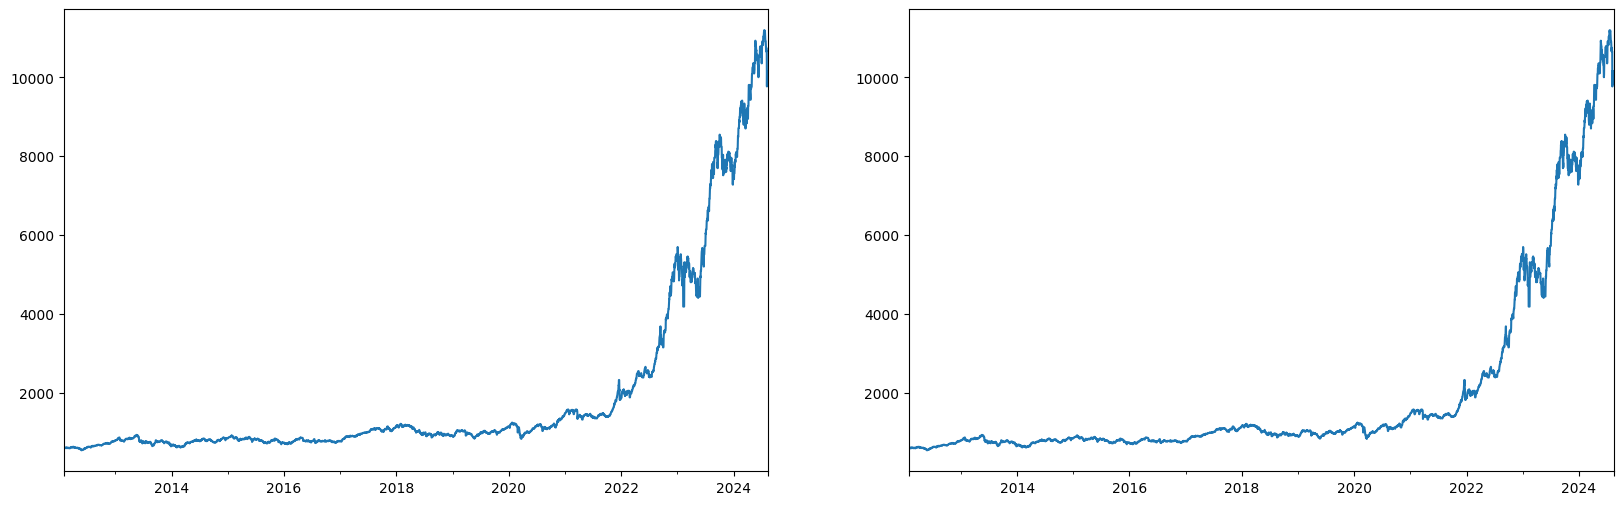

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
data_indices['Open']['XU100.IS'].plot(ax=ax[0])
df['XU100.IS'].plot(ax=ax[1])

In [11]:
df['^N225'].isnull().sum()

0

In [12]:
## This performs the logdiff transformation.
# df = df.map(lambda x: np.log(x)).diff()['2012-01-31':]

In [13]:
## This performs just the log transformation
df = df.map(lambda x: np.log(x))
df

Ticker,FTSEMIB.MI,XU100.IS,^FCHI,^FTSE,^GDAXI,^GSPC,^GSPTSE,^JKSE,^MXX,^N225,NSE30
2012-01-30,9.670104,6.346582,8.100459,8.654081,8.772539,7.182474,9.423167,8.290579,10.523347,9.082938,6.841754
2012-01-31,9.676524,6.367092,8.099254,8.643138,8.777870,7.180473,9.434963,8.272474,10.525650,9.080396,6.833269
2012-02-01,9.670483,6.347034,8.107816,8.644988,8.776931,7.179651,9.434340,8.279388,10.530099,9.081263,6.842363
2012-02-02,9.701616,6.383964,8.127591,8.664008,8.800875,7.188594,9.434699,8.285369,10.537666,9.089898,6.841808
2012-02-03,9.695971,6.394797,8.122855,8.664941,8.802307,7.190080,9.439919,8.298199,10.537736,9.088079,6.843878
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,10.367662,9.226214,8.890094,9.005160,9.779788,8.578224,10.009891,8.884608,10.875643,10.470854,8.194414
2024-08-10,10.367662,9.226214,8.890094,9.005160,9.779788,8.578224,10.009891,8.884608,10.875643,10.470854,8.194414
2024-08-11,10.367662,9.226214,8.890094,9.005160,9.779788,8.578224,10.009891,8.884608,10.875643,10.470854,8.194414
2024-08-12,10.370016,9.208358,8.895197,9.007992,9.786056,8.585203,10.014197,8.890844,10.879662,10.470854,8.199714


In [14]:
pd.DataFrame.to_csv(df.round(6), 'indices.csv', index=False, header=False)
# pd.DataFrame.to_csv(data.round(6), 'alldata.txt', index=False, header=False, sep=',')

In [15]:
df.mean()

Ticker
FTSEMIB.MI     9.966377
XU100.IS       7.176213
^FCHI          8.550680
^FTSE          8.836761
^GDAXI         9.361449
^GSPC          7.894446
^GSPTSE        9.681384
^JKSE          8.628145
^MXX          10.729250
^N225          9.921803
NSE30          7.349305
dtype: float64